## imports



In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Task 1  

Perform EDA and feature selection

## 1 - Check and handle for duplicates & null values. [ 0.5 pts ]


In [103]:
data = pd.read_csv('/content/MBA.csv')
data


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [104]:


cat_vars = data.select_dtypes(include=['object']).columns

data_onehot = pd.get_dummies(data, columns=cat_vars)

print(data_onehot.head())

   application_id  international   gpa   gmat  work_exp  gender_Female  \
0               1          False  3.30  620.0       3.0           True   
1               2          False  3.28  680.0       5.0          False   
2               3           True  3.30  710.0       5.0           True   
3               4          False  3.47  690.0       6.0          False   
4               5          False  3.35  590.0       5.0          False   

   gender_Male  major_Business  major_Humanities  major_STEM  ...  \
0        False            True             False       False  ...   
1         True           False              True       False  ...   
2        False            True             False       False  ...   
3         True           False             False        True  ...   
4         True           False             False        True  ...   

   work_industry_Investment Management  work_industry_Media/Entertainment  \
0                                False                         

In [105]:
data.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [106]:
data.duplicated().value_counts()

,count
False,6194


In [107]:
data.drop_duplicates()
#there is no duplicates

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [108]:
data.isna().count()

,0
application_id,6194
gender,6194
international,6194
gpa,6194
major,6194
race,6194
gmat,6194
work_exp,6194
work_industry,6194
admission,6194


In [134]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['international'].fillna(data['international'].mode()[0], inplace=True)
data['major'].fillna(data['major'].mode()[0], inplace=True)
data['race'].fillna(data['race'].mode()[0], inplace=True)
data['work_industry'].fillna(data['work_industry'].mode()[0], inplace=True)
data['admission'].fillna('rejected', inplace=True)

data['gpa'].fillna(data['gpa'].mean(), inplace=True)
data['gmat'].fillna(data['gmat'].mean(), inplace=True)
data['work_exp'].fillna(data['work_exp'].mean(), inplace=True)


In [110]:
data['gpa'].fillna(data['gpa'].mean())

,gpa
0,3.30
1,3.28
2,3.30
3,3.47
4,3.35
...,...
6189,3.49
6190,3.18
6191,3.22
6192,3.36


In [111]:
data['gmat'].fillna(data['gmat'].mean())

,gmat
0,620.0
1,680.0
2,710.0
3,690.0
4,590.0
...,...
6189,640.0
6190,670.0
6191,680.0
6192,590.0


In [112]:
data['work_exp'].fillna(data['work_exp'].mean())

,work_exp
0,3.0
1,5.0
2,5.0
3,6.0
4,5.0
...,...
6189,5.0
6190,4.0
6191,5.0
6192,5.0


## 2- Check for outliers using two different methods and plot them, explain how you will handle them and why [ 1 pts ]

##using boxplot


<Axes: xlabel='gmat'>

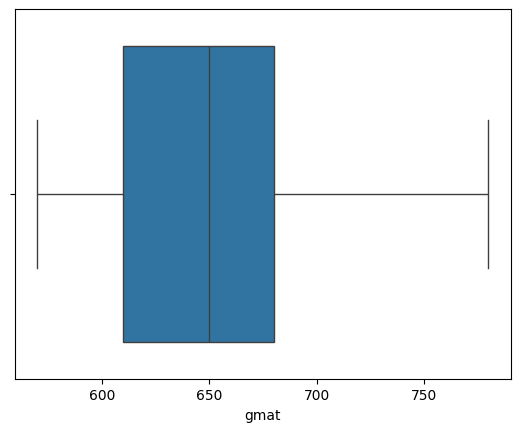

In [113]:
col=['gpa'	,'gmat'	,'work_exp']
sns.boxplot(x=data["gmat"])

# no outliers

<Axes: xlabel='gpa'>

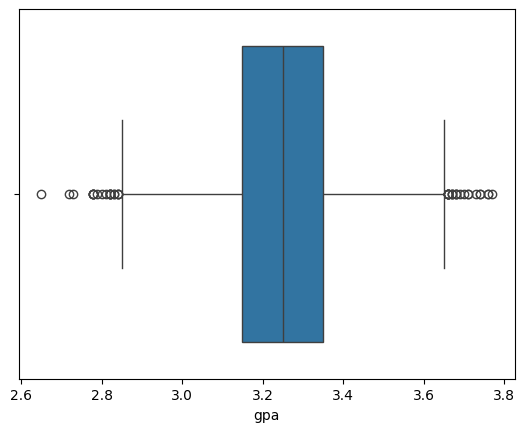

In [114]:
sns.boxplot(x=data["gpa"])
# there is some outliers we can fill them with mean

<Axes: xlabel='work_exp'>

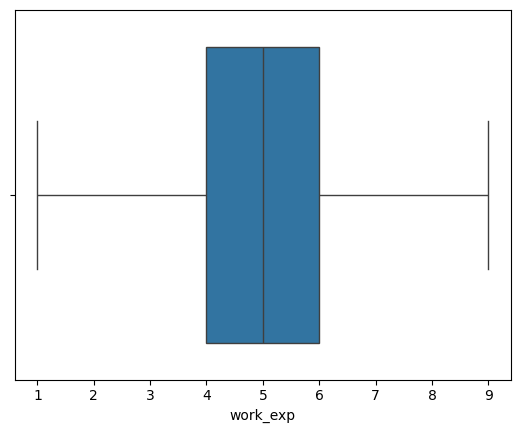

In [115]:
sns.boxplot(x=data["work_exp"])
# no outliers

##Zscore


In [116]:
from scipy import stats
stats.zscore(data[col])

,gpa,gmat,work_exp
0,0.325261,-0.630806,-1.953750
1,0.193273,0.586457,-0.016421
2,0.325261,1.195089,-0.016421
3,1.447159,0.789334,0.952244
4,0.655231,-1.239437,-0.016421
...,...,...,...
6189,1.579147,-0.225052,-0.016421
6190,-0.466667,0.383580,-0.985085
6191,-0.202691,0.586457,-0.016421
6192,0.721225,-1.239437,-0.016421


## 3 - Plot the target variable distribution [ 0.5 pts ]

<Axes: >

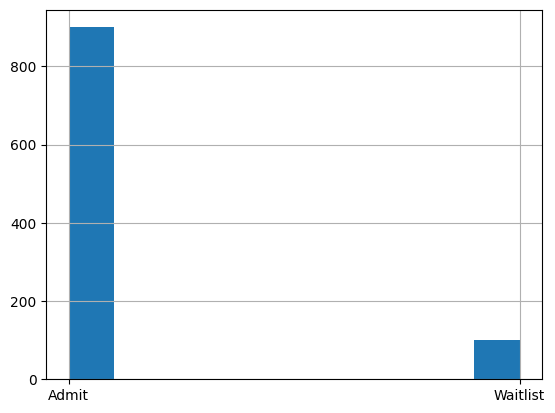

In [117]:
data['admission'].hist()

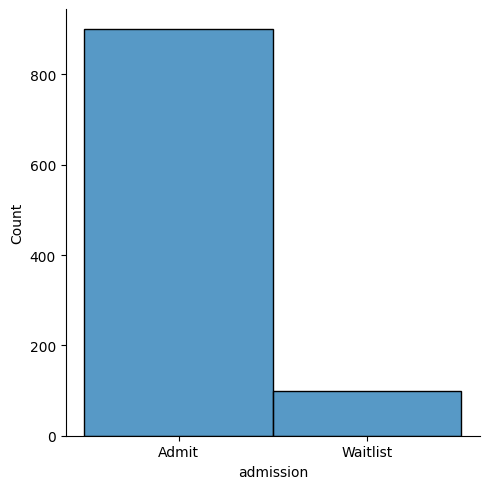

In [118]:
import seaborn as sns
sns.displot(data['admission'])

## 4 - Plot and explain variables distributions ( at least 3 variables) [ 1 pts ]

<Axes: >

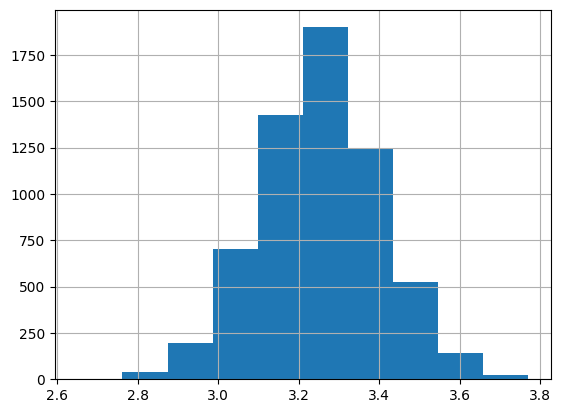

In [119]:
data['gpa'].hist()
# it follows normal dist approximatly

<Axes: >

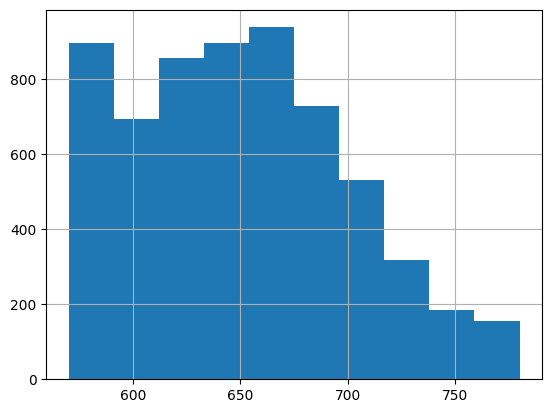

In [120]:
data['gmat'].hist()
#right skewed

<Axes: >

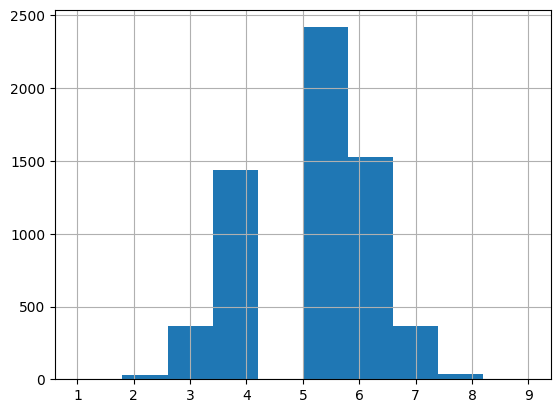

In [121]:
data['work_exp'].hist()
#left skewed

In [122]:
data.dropna()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
6,7,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
12,13,Female,False,3.24,Humanities,Hispanic,640.0,6.0,PE/VC,Waitlist
14,15,Female,False,3.03,STEM,White,600.0,5.0,Technology,Admit
16,17,Female,False,3.32,Business,Asian,710.0,5.0,PE/VC,Admit
...,...,...,...,...,...,...,...,...,...,...
6150,6151,Female,False,3.46,Business,Asian,680.0,5.0,Investment Banking,Admit
6152,6153,Female,False,3.31,Business,Black,690.0,3.0,Other,Admit
6168,6169,Female,False,3.21,STEM,White,680.0,5.0,Consulting,Admit
6175,6176,Female,False,3.38,Humanities,Hispanic,680.0,3.0,Technology,Admit


## 5 - Apply any Warper method (as explained in the tutorials) to find the most 5 valuable features, and comment on them  [ 2 pts ]

In [137]:

data.dropna()
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns

X = data[numerical_vars]
y = data['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:

model = LogisticRegression()

rfe = RFE(model, n_features_to_select=5)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print(selected_features)

print(rfe.estimator_.coef_)

Index(['application_id', 'gpa', 'gmat', 'work_exp'], dtype='object')
[[-1.15169854e-05 -1.56689202e+00  8.77166551e-03  1.18251793e-01]
 [-1.78671199e-04 -1.48679833e-01  5.84014921e-04 -2.73079348e-01]
 [ 1.90188186e-04  1.71557185e+00 -9.35568043e-03  1.54827555e-01]]


# Task 2

Using a Logistic Regression model with all the features, do the following

## 1 - Plot the precision-recall curve, use it to calculate AUC, and explain it in detail.  [ 1 pts ]
hint: drop the “whitelist” to become binary classification.


In [139]:

rfe = RFE(model, n_features_to_select=5)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]


In [140]:

selected_features


print(rfe.estimator_.coef_)

[[-1.15169854e-05 -1.56689202e+00  8.77166551e-03  1.18251793e-01]
 [-1.78671199e-04 -1.48679833e-01  5.84014921e-04 -2.73079348e-01]
 [ 1.90188186e-04  1.71557185e+00 -9.35568043e-03  1.54827555e-01]]


## 2 -  Use variance inflation factor to identify any significant multi-collinearity, explain criteria in detail [ 2 pts ]

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for VIF calculation
X = sm.add_constant(data[numerical_vars])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + list(numerical_vars)  # Include the constant term
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature  VIF Factor
0           const  487.815696
1  application_id    1.000219
2             gpa    1.500773
3            gmat    1.500519
4        work_exp    1.000012


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure numerical_vars is correctly defined
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Add a constant column for VIF calculation
X = sm.add_constant(data[numerical_vars])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + list(numerical_vars)  # Include the constant term
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)  # Print VIF DataFrame to verify contents

# Check for significant multicollinearity
threshold = 5
significant_multicollinearity = vif_data[vif_data["VIF Factor"] > threshold]

print("Significant multi-collinearity:")
print(significant_multicollinearity)


          Feature  VIF Factor
0           const  487.815696
1  application_id    1.000219
2             gpa    1.500773
3            gmat    1.500519
4        work_exp    1.000012
Significant multi-collinearity:
  Feature  VIF Factor
0   const  487.815696


## 3 - Calculate Cook’s distance, and plot it with the observations, explain the graph [ 2 pts ]

In [130]:
numerical_vars


Index(['application_id', 'gpa', 'gmat', 'work_exp'], dtype='object')

In [131]:
np.asarray(data)

array([[1, 'Female', False, ..., 3.0, 'Financial Services', 'Admit'],
       [2, 'Male', False, ..., 5.0, 'Investment Management', nan],
       [3, 'Female', True, ..., 5.0, 'Technology', 'Admit'],
       ...,
       [6192, 'Female', True, ..., 5.0, 'Health Care', 'Admit'],
       [6193, 'Male', True, ..., 5.0, 'Other', nan],
       [6194, 'Male', False, ..., 4.0, 'Consulting', nan]], dtype=object)

In [148]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

# Ensure numerical_vars only contains numeric columns
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Convert the target variable to numeric if it's categorical
data['admission'] = pd.to_numeric(data['admission'], errors='coerce')

# Drop NaN values that may have been introduced during conversion
data = data.dropna(subset=['admission'])

# Add a constant for OLS regression
X = sm.add_constant(data[numerical_vars])

# Fit the OLS model
model = sm.OLS(data['admission'], X).fit()

# Calculate Cook’s distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance[0]

# Plot Cook’s distance
plt.figure(figsize=(8,5))
plt.scatter(range(len(data)), cook_distance, alpha=0.7, label="Cook's Distance")
plt.axhline(4/len(data), color='r', linestyle='dashed', label="Threshold (4/n)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity